# **AUTHOR - KARTIK KHANDELWAL**

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/Machine Learning Datasets/Iris - Unsupervised Learing Dataset/Iris.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Null Values

In [ ]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Visualizing Data

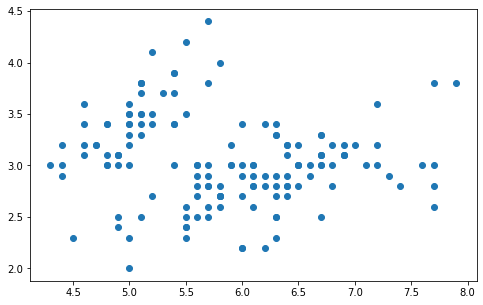

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x= dataset['SepalLengthCm'], y = dataset['SepalWidthCm'])

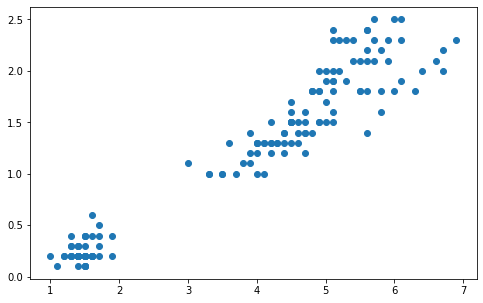

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x= dataset['PetalLengthCm'], y = dataset['PetalWidthCm'])

Scaling the Dataset

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[['SepalLengthCm']])
dataset['SepalLengthCm'] = scaler.transform(dataset[['SepalLengthCm']])

scaler.fit(dataset[['SepalWidthCm']])
dataset['SepalWidthCm'] = scaler.transform(dataset[['SepalWidthCm']])

scaler.fit(dataset[['PetalLengthCm']])
dataset['PetalLengthCm'] = scaler.transform(dataset[['PetalLengthCm']])

scaler.fit(dataset[['PetalWidthCm']])
dataset['PetalWidthCm'] = scaler.transform(dataset[['PetalWidthCm']])

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa


Visualization of Number of Clusters

In [ ]:
X = dataset.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

l  = []
for i in range(1,10):
    model = KMeans(n_clusters=i, random_state = 42)
    model.fit(X)
    l.append(model.inertia_)


Selecting the correct number of clusters using 'ELBOW METHOD'.

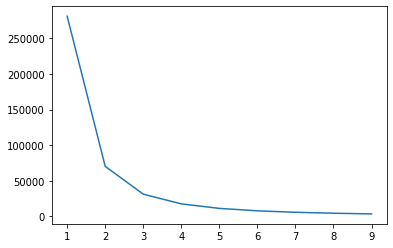

In [ ]:
plt.plot(range(1, 10), l)
plt.show()

By using elbow method we can clearly observe from above graph that the correct no. of clusters = 3.


Model Fitting

In [ ]:
model = KMeans(n_clusters=3, random_state=42)

y = model.fit_predict(X)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Visualizing Output

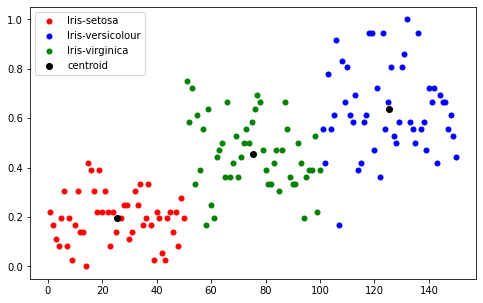

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', marker='.', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', marker='.', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', marker='.', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='black', label='centroid')
plt.legend()